# **Tugas Eksperimen 1 NLP**

1. Naufal Haritsah Luthfi   - 1301194073
>
2. Ni Made Dwipadini P      - 1301194141

>
>

# **Import Library**

In [ ]:
# Import install nltk (natural language toolkit)

!pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import library yang diperlukan
import pandas as pd

import re
from nltk.util import pad_sequence, bigrams, ngrams, everygrams
from nltk.lm.preprocessing import pad_both_ends, flatten, padded_everygram_pipeline
from nltk.tokenize import ToktokTokenizer
from nltk.lm import MLE

from keras.preprocessing.text import Tokenizer

# **Data Set**
**Deskripsi Data :**

Data set ini menyajikan data terkait artikel COVID-19 di Indonesia.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Membaca file corpus
corpus = pd.read_excel('/content/gdrive/MyDrive/corpus.xlsx')

In [ ]:
# Melihat data corpus
corpus

,Kalimat
0,Gejala awal infeksi COVID-19 bisa menyerupai g...
1,"Setelah itu, gejala dapat hilang dan sembuh at..."
2,Penderita dengan gejala yang berat bisa mengal...
3,Gejala-gejala tersebut di atas muncul ketika t...
4,Sebagian pasien COVID-19 juga ada yang mengala...
5,Kondisi ini disebut happy hypoxia.
6,"Selain itu, beberapa laporan kasus juga menyeb..."
7,Untuk memastikan apakah gejala-gejala tersebut...
8,Untuk menemukan tempat melakukan rapid test at...
9,"Pada beberapa penderita, COVID-19 dapat tidak ..."


# **Preprocessing Data**

In [ ]:
# Mengubah corpus menjadi 1 paragraf

text = ' '.join(corpus['Kalimat']).replace(u'\xa0', u' ')

# Melihat data text
text

'Gejala awal infeksi COVID-19 bisa menyerupai gejala flu, yaitu demam, pilek, batuk kering, sakit tenggorokan, dan sakit kepala. Setelah itu, gejala dapat hilang dan sembuh atau malah memberat. Penderita dengan gejala yang berat bisa mengalami demam tinggi, batuk berdahak atau berdarah, sesak napas, dan nyeri dada. Gejala-gejala tersebut di atas muncul ketika tubuh bereaksi melawan virus COVID-19. Gejala COVID-19 bisa muncul dalam 2 hari sampai 2 minggu setelah seseorang terinfeksi virus penyebabnya. Sebagian pasien COVID-19 juga ada yang mengalami penurunan oksigen tanpa adanya gejala apa pun. Kondisi ini disebut happy hypoxia. Selain itu, beberapa laporan kasus juga menyebutkan bahwa sebagian pasien COVID-19 dapat mengalami ruam kulit. Untuk memastikan apakah gejala-gejala tersebut merupakan gejala dari virus Corona, diperlukan rapid test atau PCR. Untuk menemukan tempat melakukan rapid test atau PCR di sekitar rumah anda. Pada beberapa penderita, COVID-19 dapat tidak menimbulkan gej

In [ ]:
# Proses Tokenizing

sent_tokenize = lambda x: re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', x)
toktok = ToktokTokenizer()
word_tokenize = word_tokenize = toktok.tokenize
tokenized_text = [list(map(str.lower, word_tokenize(sent)))
                  for sent in sent_tokenize(text)]

In [ ]:
# Melihat data tokenized_text
tokenized_text

[['gejala',
  'awal',
  'infeksi',
  'covid-19',
  'bisa',
  'menyerupai',
  'gejala',
  'flu',
  ',',
  'yaitu',
  'demam',
  ',',
  'pilek',
  ',',
  'batuk',
  'kering',
  ',',
  'sakit',
  'tenggorokan',
  ',',
  'dan',
  'sakit',
  'kepala',
  '.'],
 ['setelah',
  'itu',
  ',',
  'gejala',
  'dapat',
  'hilang',
  'dan',
  'sembuh',
  'atau',
  'malah',
  'memberat',
  '.'],
 ['penderita',
  'dengan',
  'gejala',
  'yang',
  'berat',
  'bisa',
  'mengalami',
  'demam',
  'tinggi',
  ',',
  'batuk',
  'berdahak',
  'atau',
  'berdarah',
  ',',
  'sesak',
  'napas',
  ',',
  'dan',
  'nyeri',
  'dada',
  '.'],
 ['gejala-gejala',
  'tersebut',
  'di',
  'atas',
  'muncul',
  'ketika',
  'tubuh',
  'bereaksi',
  'melawan',
  'virus',
  'covid-19',
  '.'],
 ['gejala',
  'covid-19',
  'bisa',
  'muncul',
  'dalam',
  '2',
  'hari',
  'sampai',
  '2',
  'minggu',
  'setelah',
  'seseorang',
  'terinfeksi',
  'virus',
  'penyebabnya',
  '.'],
 ['sebagian',
  'pasien',
  'covid-19',
  'jug

# **Pemodelan menggunakan N-gram**

###**Unigram**

In [ ]:
# Library untuk unigram
n_unigram = 1
train_data_unigram, padded_sents_unigram = padded_everygram_pipeline(n_unigram, tokenized_text)

In [ ]:
# Membuat model unigram
model_unigram = MLE(n_unigram)

In [ ]:
# Proses training
model_unigram.fit(train_data_unigram, padded_sents_unigram)

In [ ]:
# Menampilkan total n-gram dan total vocabulary

print(model_unigram.counts)

<NgramCounter with 1 ngram orders and 960 ngrams>


In [ ]:
# Menampilkan total jumlah kemunculan kata pada vocabulary dengan unigram

model_unigram.counts['covid-19']

29

###**Bigram**

In [ ]:
# Library untuk bigram
n_bigram = 2
train_data_bigram, padded_sents_bigram = padded_everygram_pipeline(n_bigram, tokenized_text)

In [ ]:
# Membuat model bigram
model_bigram = MLE(n_bigram)

In [ ]:
# Proses training
model_bigram.fit(train_data_bigram, padded_sents_bigram)

In [ ]:
# Menampilkan total n-gram dan total vocabulary

print(model_bigram.counts)

<NgramCounter with 2 ngram orders and 2073 ngrams>


In [ ]:
# Menampilkan total jumlah kemunculan kata pada vocabulary dengan bigram

model_bigram.counts[['vaksin']]['covid-19']

2

###**Trigram**

In [ ]:
# Library untuk trigram
n_trigram = 3
train_data_trigram, padded_sents_trigram = padded_everygram_pipeline(n_trigram, tokenized_text)

In [ ]:
# Membuat model trigram
model_trigram = MLE(n_trigram)

In [ ]:
# Proses training
model_trigram.fit(train_data_trigram, padded_sents_trigram)

In [ ]:
# Menampilkan total n-gram dan total vocabulary

print(model_trigram.counts)

<NgramCounter with 3 ngram orders and 3339 ngrams>


In [ ]:
# Menampilkan total jumlah kemunculan kata pada vocabulary dengan bigram
model_trigram.counts[['covid-19' , 'adalah']]['penyakit']

1

###**Analisis Hasil N-gram**

In [ ]:
# Menampilkan prediksi model unigram, bigram, dan trigram

print('Model unigram prediksi : ',model_unigram.generate(5))
print('Model bigram prediksi  : ',model_bigram.generate(5))
print('Model trigram prediksi : ',model_trigram.generate(5))

Model unigram prediksi :  ['tutup', 'pengarahan', 'di', 'kecuali', 'indonesia']
Model bigram prediksi  :  ['daerah', 'yang', 'ringan', 'dapat', 'mengatasi']
Model trigram prediksi :  ['melakukan', 'perawatan', 'atau', 'isolasi', 'mandiri']


# **Pemodelan menggunakan Neural Based**

In [ ]:
# Import library yang diperlukan untuk pemodelan neural based

import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Menampilkan data text

text = "Gejala awal infeksi COVID-19 bisa menyerupai gejala flu, yaitu demam, pilek, batuk kering, sakit tenggorokan, dan sakit kepala. Setelah itu, gejala dapat hilang dan sembuh atau malah memberat. Penderita dengan gejala yang berat bisa mengalami demam tinggi, batuk berdahak atau berdarah, sesak napas, dan nyeri dada. Gejala-gejala tersebut di atas muncul ketika tubuh bereaksi melawan virus COVID-19. Gejala COVID-19 bisa muncul dalam 2 hari sampai 2 minggu setelah seseorang terinfeksi virus penyebabnya. Sebagian pasien COVID-19 juga ada yang mengalami penurunan oksigen tanpa adanya gejala apa pun. Kondisi ini disebut happy hypoxia. Selain itu, beberapa laporan kasus juga menyebutkan bahwa sebagian pasien COVID-19 dapat mengalami ruam kulit. Untuk memastikan apakah gejala-gejala tersebut merupakan gejala dari virus Corona, diperlukan rapid test atau PCR. Untuk menemukan tempat melakukan rapid test atau PCR di sekitar rumah anda. Pada beberapa penderita, COVID-19 dapat tidak menimbulkan gejala sama sekali. Orang yang sudah terkonfirmasi positif COVID-19 melalui pemeriksaan RT-PCR namun tidak mengalami gejala disebut sebagai kasus konfirmasi asimptomatik. Penderita ini tetap bisa menularkan COVID-19 ke orang lain. Pada bulan Juli 2020, Kementerian Kesehatan Republik Indonesia mengganti istilah operasional lama pada COVID-19, seperti ODP, PDP, OTG menjadi istilah baru, yakni suspek, probable, dan konfirmasi. Segera lakukan isolasi mandiri bila Anda mengalami gejala infeksi COVID-19 seperti yang telah disebutkan di atas, terutama jika dalam 2 minggu terakhir Anda berada di daerah yang memiliki kasus COVID-19 atau kontak dengan penderita COVID-19. Setelah itu, hubungi hotline COVID-19 di 119 Ext. 9 untuk mendapatkan pengarahan lebih lanjut.  Sampai saat ini, belum ada obat yang secara pasti dapat mengatasi penyakit COVID-19. Jika Anda didiagnosis COVID-19 tetapi tidak mengalami gejala atau hanya mengalami gejala ringan, Anda cukup melakukan perawatan atau isolasi mandiri di rumah. Ruangan isolasi harus memiliki ventilasi dan cahaya yang baik serta pertukaran udara yang cukup.  Selain itu, ruangan isolasi juga wajib dibersihkan setiap hari dengan air sabun atau desinfektan. Penelitian menunjukkan bahwa pasien COVID-19 dengan gejala ringan dapat sembuh dalam 2 minggu. Namun, sebelum Anda mengakhiri isolasi mandiri dan kembali beraktivitas, tetap lakukan konsultasi dengan dokter untuk mengetahui apakah Anda sudah memenuhi kriteria sembuh dari COVID-19.  Saat ini, Indonesia sedang menjalankan program vaksinasi COVID-19 secara bertahap. Sampai 4 November 2021, sudah lebih dari 122 juta penduduk yang menerima vaksin dosis pertama dan 76 juta orang yang menerima vaksin dosis kedua. Vaksinasi COVID-19 bertujuan untuk membangun kekebalan tubuh terhadap virus Corona, sekaligus membentuk kekebalan kelompok atau herd immunity. Makin banyak orang yang divaksinasi, makin cepat pula penularan COVID-19 terputus. Selain itu, kondisi ekonomi yang terdampak oleh pandemi juga akan pulih. Agar tujuan-tujuan di atas tercapai, vaksin COVID-19 kini diberikan pada anak usia 6–18 tahun, ibu hamil, dan ibu menyusui. Sedangkan bagi orang dengan riwayat penyakit atau kondisi kesehatan tertentu, pemberian vaksin harus disertai ijin dari dokter. Perlu diketahui, meski Anda telah menerima vaksin COVID-19 dosis kedua, Anda tetap harus menghindari faktor-faktor yang bisa meningkatkan risiko terinfeksi virus ini. Jangan menyentuh mata, mulut, dan hidung sebelum mencuci tangan. Tingkatkan daya tahan tubuh dengan pola hidup sehat, misalnya olahraga rutin dan konsumsi makanan bergizi serta suplemen. Hindari kontak dengan penderita COVID-19, orang yang dicurigai positif terinfeksi COVID-19, atau orang yang sedang sakit demam, batuk, atau pilek. Tutup mulut dan hidung dengan tisu saat batuk atau bersin, kemudian buang tisu ke tempat sampah. Jaga kebersihan benda yang sering disentuh dan kebersihan lingkungan, termasuk kebersihan rumah. Jaga sirkulasi dan kebersihan udara di dalam ruangan. Bila perlu, Anda bisa menggunakan air purifier. Untuk orang yang diduga terkena COVID-19 (termasuk kategori suspek dan probable) yang sebelumnya disebut sebagai ODP (orang dalam pemantauan) dan PDP (pasien dalam pengawasan), ada beberapa langkah yang bisa dilakukan agar tidak menularkan virus Corona ke orang lain, yaitu: Lakukan isolasi mandiri dengan tinggal di ruangan yang terpisah dengan orang lain untuk sementara waktu. Bila tidak memungkinkan, gunakan kamar tidur dan kamar mandi yang berbeda dengan yang digunakan orang lain. Konsumsi obat-obatan yang disarankan oleh dokter.  Lakukan pengukuran suhu 2 kali sehari, pagi dan malam hari Jangan keluar rumah, kecuali untuk mendapatkan pengobatan.  Bila ingin ke rumah sakit saat gejala bertambah berat, sebaiknya hubungi dulu pihak rumah sakit untuk menjemput. Larang dan cegah orang lain untuk mengunjungi atau menjenguk Anda sampai Anda benar-benar sembuh. Sebisa mungkin jangan melakukan pertemuan dengan orang yang sedang sedang sakit. Hindari berbagi penggunaan alat makan dan minum, alat mandi, serta perlengkapan tidur dengan orang lain. Pakai masker dan sarung tangan bila terpaksa harus berada di tempat umum, seperti rumah sakit atau sedang bersama orang lain. Gunakan tisu untuk menutup mulut dan hidung bila batuk atau bersin, lalu segera buang tisu ke tempat sampah. Kondisi-kondisi yang memerlukan penanganan langsung oleh dokter di rumah sakit, seperti melahirkan, operasi, cuci darah, atau vaksinasi anak, akan ditangani secara berbeda dengan beberapa penyesuaian selama pandemi COVID-19.  Tujuannya adalah untuk mencegah penularan COVID-19 selama Anda berada di rumah sakit. Konsultasikan dengan dokter mengenai tindakan terbaik yang perlu dilakukan. COVID-19 adalah penyakit akibat infeksi virus severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). COVID-19 dapat menyebabkan gangguan sistem pernapasan, mulai dari gejala yang ringan seperti flu, hingga infeksi paru-paru, seperti pneumonia."
text

'Gejala awal infeksi COVID-19 bisa menyerupai gejala flu, yaitu demam, pilek, batuk kering, sakit tenggorokan, dan sakit kepala. Setelah itu, gejala dapat hilang dan sembuh atau malah memberat. Penderita dengan gejala yang berat bisa mengalami demam tinggi, batuk berdahak atau berdarah, sesak napas, dan nyeri dada. Gejala-gejala tersebut di atas muncul ketika tubuh bereaksi melawan virus COVID-19. Gejala COVID-19 bisa muncul dalam 2 hari sampai 2 minggu setelah seseorang terinfeksi virus penyebabnya. Sebagian pasien COVID-19 juga ada yang mengalami penurunan oksigen tanpa adanya gejala apa pun. Kondisi ini disebut happy hypoxia. Selain itu, beberapa laporan kasus juga menyebutkan bahwa sebagian pasien COVID-19 dapat mengalami ruam kulit. Untuk memastikan apakah gejala-gejala tersebut merupakan gejala dari virus Corona, diperlukan rapid test atau PCR. Untuk menemukan tempat melakukan rapid test atau PCR di sekitar rumah anda. Pada beberapa penderita, COVID-19 dapat tidak menimbulkan gej

In [ ]:
# Generate a sequence from the model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
  in_text = seed_text
  # Generate a fixed number of words
  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
    yhat_en = model.predict(encoded)
    yhat = np.argmax(yhat_en,axis=1)[0]
    out_word = ''
    for word, index in tokenizer.word_index.items():
      # Print(index)
      if index == yhat:
        out_word = word
        break
    in_text += ' ' + out_word
  return in_text

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]
# Retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# Encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
	sequence = encoded[i-2:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# Pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# Split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
# Define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# Compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit network
history = model.fit(X, y, epochs=250, verbose=2)
# Evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'covid', 19))

Vocabulary Size: 389
Total Sequences: 871
Max Sequence Length: 3
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 2, 10)             3890      
                                                                 
 lstm_22 (LSTM)              (None, 50)                12200     
                                                                 
 dense_22 (Dense)            (None, 389)               19839     
                                                                 
Total params: 35,929
Trainable params: 35,929
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
28/28 - 2s - loss: 5.9610 - accuracy: 0.0172 - 2s/epoch - 79ms/step
Epoch 2/250
28/28 - 0s - loss: 5.9453 - accuracy: 0.0276 - 94ms/epoch - 3ms/step
Epoch 3/250
28/28 - 0s - loss: 5.9135 - accuracy: 0.0574 - 92ms/epoch - 3ms/step
E

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

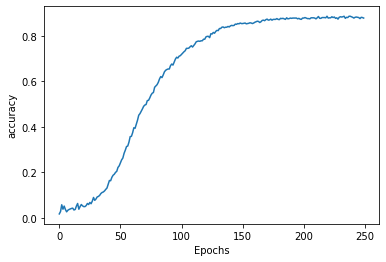

In [ ]:
# Menampilkan line plot antara accuracy dengan epochs

plot_graphs(history, 'accuracy')

In [ ]:
# Menampilkan angka akurasi maksimal

max(history.history['accuracy'])

0.8863375186920166